##  🏀 NBA Player Comparison
This analysis was completed as part of the **"Foundations of Sports Analytics: Data, Representation, and Models in Sports"** course offered by the University of Michigan via Coursera.

In this week's notebook, I analyzed NBA shot log data from the 2016/2017 season. The goal is to compare shot patterns across selected players - including Kevin Durant, Dwight Howard, Russell Westbrook, and others - by visualizing their shot charts and identifying patterns and differences in their behavior. 

Key steps include:
- 🧹 Loading and preparing the NBA shot log dataset
- 📐 Projecting shots onto a half-court model
- 📊 Visualizing individual player shot charts side-by-side
- 🔎 Comparing players based on shot frequency and location

The notebook applies essential Python packages such as *pandas*, *numpy*, and *matplotlib* for data handling and visualization. 

### Join me on my data journey within the context of sports performance!

### Task Overview:

(1) Load the data containing the NBA shot log for the 2016/17 season that we used earlier

(2) Use the same code that we used to project all shots onto a half court by defining shot[‘halfcourt_x’] and shot[‘halfcourt_y’]

(3) Now define subsets for the following players: Kevin Durant, Dwight Howard, DeAndre Jordan and Russell Westbrook.

(4) Create plots of their shots in the same way that we did for Steph Curry and LeBron James: copy the code we used and just change the names. Show the plots of Russell Westbrook and Kevin Durant side by side. In order to make sure that the two plots have the same ranges, for each subplot add the lines:

- plt.xlim(500,950)
- plt.ylim(0,500)
  
(5) Create the plot of DeAndre Jordan and Dwight Howard side by side

(6) Create the plot of Brook Lopez and Robin Lopez side by side

In [2]:
# As usual, we begin by importing the packages we will need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# (1)The data consists of the shot log for the NBA season 2016/17

shot = pd.read_csv("NBA shotlog_16_17.csv")
pd.set_option('display.max_columns', 100)
print(shot.columns.tolist())
shot.describe()

['self_previous_shot', 'player_position', 'home_game', 'location_x', 'opponent_previous_shot', 'home_team', 'shot_type', 'points', 'away_team', 'location_y', 'time', 'date', 'shoot_player', 'time_from_last_shot', 'quarter', 'current_shot_outcome']


,location_x,points,location_y,time_from_last_shot,quarter
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383
std,345.063654,0.464965,111.02320,19.797357,1.136841
min,0.000000,2.000000,0.00000,0.000000,1.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000


In [8]:
# (2)  Use the same code that we used to project all shots onto a half court by defining shot[‘halfcourt_x’] and shot[‘halfcourt_y’]

shot['halfcourt_x'] = np.where(shot['location_x'] < 933/2, 933 - shot['location_x'], shot['location_x'])
shot['halfcourt_y'] = np.where(shot['location_y'] < 933/2, 500 - shot['location_y'], shot['location_y'])

In [12]:
# (3) Now define subsets for the following players: Kevin Durant, Dwight Howard, DeAndre Jordan and Russell Westbrook.
# Kevin Durant

Durant = shot[shot['shoot_player'] == 'Kevin Durant']
Durant

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
63211,MISSED,SF,Yes,197.0,SCORED,GSW,Turnaround Fadeaway,2,SAS,244.0,1:05,10/25/2016,Kevin Durant,26.0,1,SCORED,736.0,256.0
63217,MISSED,SF,Yes,98.0,MISSED,GSW,Step Back Jump Shot,2,SAS,87.0,5:01,10/25/2016,Kevin Durant,27.0,1,SCORED,835.0,413.0
63218,SCORED,SF,Yes,92.0,MISSED,GSW,Turnaround Fadeaway,2,SAS,413.0,5:34,10/25/2016,Kevin Durant,33.0,1,SCORED,841.0,87.0
63219,SCORED,SF,Yes,244.0,MISSED,GSW,Pullup Jump Shot,3,SAS,423.0,5:59,10/25/2016,Kevin Durant,25.0,1,SCORED,689.0,77.0
63227,SCORED,SF,Yes,103.0,SCORED,GSW,Pullup Jump Shot,2,SAS,125.0,11:07,10/25/2016,Kevin Durant,35.0,1,MISSED,830.0,375.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70306,SCORED,SF,Yes,148.0,SCORED,GSW,Turnaround Jump Shot,2,LAL,295.0,11:17,4/12/2017,Kevin Durant,22.0,2,SCORED,785.0,205.0
70312,MISSED,SF,Yes,890.0,MISSED,GSW,Jump Shot,3,LAL,15.0,2:53,4/12/2017,Kevin Durant,28.0,3,MISSED,890.0,485.0
70314,SCORED,SF,Yes,666.0,SCORED,GSW,Jump Shot,3,LAL,395.0,4:18,4/12/2017,Kevin Durant,32.0,3,SCORED,666.0,105.0
70323,MISSED,SF,Yes,878.0,MISSED,GSW,Layup,2,LAL,238.0,9:59,4/12/2017,Kevin Durant,50.0,3,MISSED,878.0,262.0


In [14]:
#Dwight Howard

Howard = shot[shot['shoot_player']=='Dwight Howard']
Howard

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
1,MISSED,C,Yes,52.0,SCORED,ATL,Tip Dunk Shot,2,WAS,250.0,1:11,10/27/2016,Dwight Howard,2.0,1,SCORED,881.0,250.0
8,MISSED,C,Yes,107.0,SCORED,ATL,Turnaround Jump Shot,2,WAS,254.0,4:04,10/27/2016,Dwight Howard,3.0,1,MISSED,826.0,246.0
15,MISSED,C,Yes,62.0,MISSED,ATL,Jump Shot,2,WAS,329.0,7:36,10/27/2016,Dwight Howard,3.0,1,SCORED,871.0,171.0
17,MISSED,C,Yes,82.0,MISSED,ATL,Jump Bank Shot,2,WAS,373.0,8:22,10/27/2016,Dwight Howard,22.0,1,MISSED,851.0,127.0
39,MISSED,C,Yes,112.0,MISSED,ATL,Hook Shot,2,WAS,278.0,8:37,10/27/2016,Dwight Howard,125.0,2,SCORED,821.0,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6797,MISSED,C,Yes,52.0,SCORED,ATL,Dunk,2,CHA,250.0,11:16,4/11/2017,Dwight Howard,115.0,2,MISSED,881.0,250.0
6805,MISSED,C,Yes,890.0,MISSED,ATL,Tip Layup Shot,2,CHA,240.0,2:33,4/11/2017,Dwight Howard,4.0,3,MISSED,890.0,260.0
6806,MISSED,C,Yes,887.0,MISSED,ATL,Tip Layup Shot,2,CHA,256.0,2:34,4/11/2017,Dwight Howard,1.0,3,SCORED,887.0,244.0
6807,SCORED,C,Yes,888.0,SCORED,ATL,Alley Oop Dunk,2,CHA,250.0,3:25,4/11/2017,Dwight Howard,51.0,3,SCORED,888.0,250.0


In [16]:
#DeAndre Jordan

Jordan = shot[shot['shoot_player']=='DeAndre Jordan']
Jordan

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
84433,MISSED,C,No,895.0,MISSED,POR,Layup,2,LAC,267.0,3:33,10/27/2016,DeAndre Jordan,2.0,1,BLOCKED,895.0,233.0
84435,MISSED,C,No,888.0,BLOCKED,POR,Putback Dunk,2,LAC,250.0,4:08,10/27/2016,DeAndre Jordan,0.0,1,SCORED,888.0,250.0
84466,MISSED,C,No,878.0,SCORED,POR,Reverse Layup,2,LAC,272.0,9:30,10/27/2016,DeAndre Jordan,17.0,2,MISSED,878.0,228.0
84467,MISSED,C,No,887.0,SCORED,POR,Tip Layup Shot,2,LAC,272.0,9:30,10/27/2016,DeAndre Jordan,0.0,2,MISSED,887.0,228.0
84477,MISSED,C,No,51.0,SCORED,POR,Tip Layup Shot,2,LAC,249.0,2:23,10/27/2016,DeAndre Jordan,1.0,3,MISSED,882.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91202,MISSED,C,Yes,53.0,SCORED,LAC,Tip Layup Shot,2,SAC,262.0,9:03,4/12/2017,DeAndre Jordan,5.0,2,SCORED,880.0,238.0
91213,SCORED,C,Yes,888.0,SCORED,LAC,Cutting Dunk Shot,2,SAC,250.0,3:14,4/12/2017,DeAndre Jordan,41.0,3,SCORED,888.0,250.0
91215,SCORED,C,Yes,888.0,SCORED,LAC,Dunk,2,SAC,250.0,4:24,4/12/2017,DeAndre Jordan,28.0,3,SCORED,888.0,250.0
91228,MISSED,C,Yes,888.0,MISSED,LAC,Alley Oop Dunk,2,SAC,250.0,1:28,4/12/2017,DeAndre Jordan,38.0,4,SCORED,888.0,250.0


In [20]:
#Russell Westbrook

Westbrook = shot[shot['shoot_player']=='Russell Westbrook']
Westbrook

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
140311,NaN,PG,No,853.0,NaN,PHI,Jump Shot,2,OKL,76.0,0:17,10/26/2016,Russell Westbrook,NaN,1,MISSED,853.0,424.0
140314,MISSED,PG,No,802.0,SCORED,PHI,Pullup Jump Shot,2,OKL,367.0,1:51,10/26/2016,Russell Westbrook,50.0,1,SCORED,802.0,133.0
140319,BLOCKED,PG,No,853.0,SCORED,PHI,Jump Shot,2,OKL,308.0,3:59,10/26/2016,Russell Westbrook,27.0,1,BLOCKED,853.0,192.0
140321,SCORED,PG,No,809.0,SCORED,PHI,Pullup Jump Shot,2,OKL,433.0,4:54,10/26/2016,Russell Westbrook,34.0,1,MISSED,809.0,67.0
140322,MISSED,PG,No,895.0,SCORED,PHI,Driving Finger Roll Layup,2,OKL,270.0,5:44,10/26/2016,Russell Westbrook,50.0,1,SCORED,895.0,230.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147393,MISSED,PG,Yes,118.0,SCORED,OKL,Pullup Jump Shot,3,DEN,25.0,7:55,4/12/2017,Russell Westbrook,37.0,1,SCORED,815.0,475.0
147394,SCORED,PG,Yes,241.0,MISSED,OKL,Jump Shot,3,DEN,69.0,8:28,4/12/2017,Russell Westbrook,33.0,1,MISSED,692.0,431.0
147420,BLOCKED,PG,Yes,126.0,MISSED,OKL,Turnaround Jump Shot,2,DEN,367.0,8:51,4/12/2017,Russell Westbrook,47.0,2,SCORED,807.0,133.0
147425,MISSED,PG,Yes,298.0,SCORED,OKL,Jump Shot,3,DEN,370.0,11:09,4/12/2017,Russell Westbrook,35.0,2,MISSED,635.0,130.0


## Westbrook - Durant Comparision

In [27]:
# (4) Create plots of their shots in the same way that we did for Steph Curry and LeBron James: copy the code we used and just change the 
#names. Show the plots of Russell Westbrook and Kevin Durant side by side. In order to make sure that the two plots have the same ranges, 
#for each subplot add the lines:
#plt.xlim(500,950)
#plt.ylim(0,500)

Text(0.5, 1.0, 'Durant')

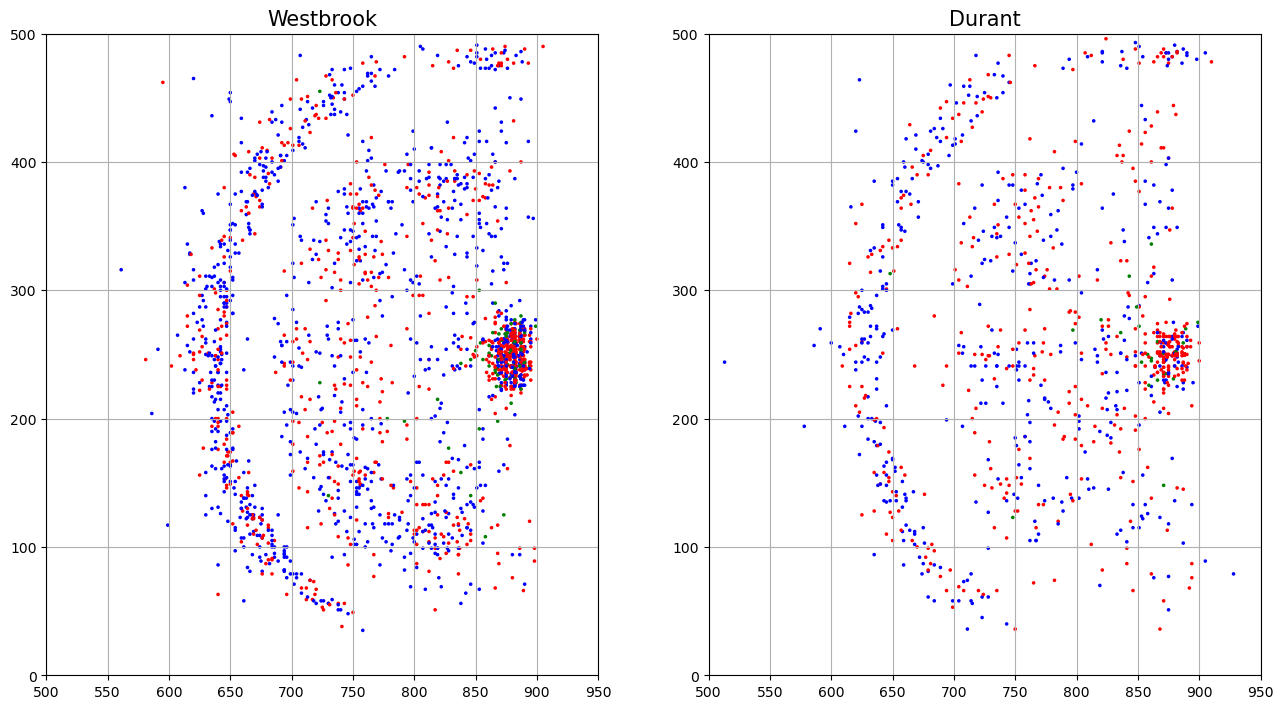

In [47]:
hxW= Westbrook['halfcourt_x']
hyW= Westbrook['halfcourt_y']
hxD= Durant['halfcourt_x']
hyD= Durant['halfcourt_y']

f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(Westbrook['current_shot_outcome']=='SCORED','r',np.where(Westbrook['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxW,hyW,s=10,c=colors,marker='.')
plt.grid(True)
plt.xlim(500,950)
plt.ylim(0,500)
plt.title('Westbrook', fontsize=15)
ax = f.add_subplot(122)
colors = np.where(Durant['current_shot_outcome']=='SCORED','r',np.where(Durant['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxD,hyD,s=10,c=colors,marker='.')
plt.grid(True)
plt.xlim(500,950)
plt.ylim(0,500)
plt.title('Durant', fontsize=15)

## Jordan - Howard Comparision

Text(0.5, 1.0, 'Howard')

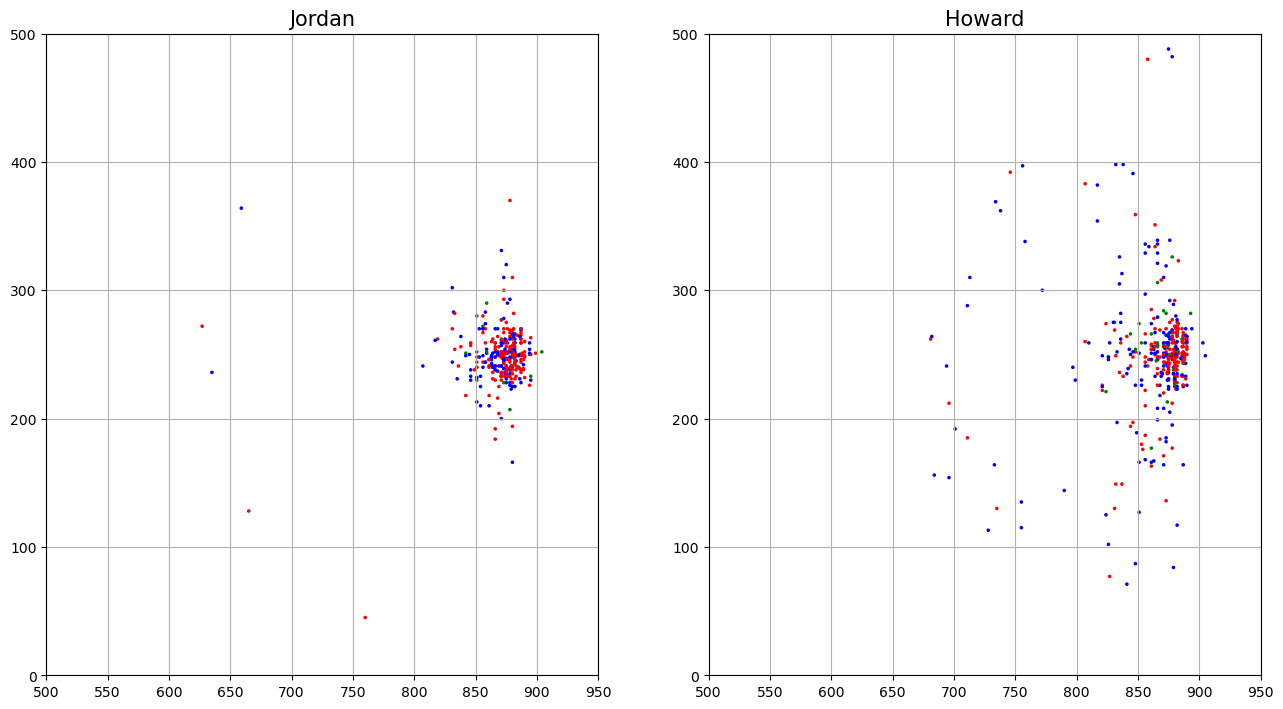

In [49]:
# (5) Create the plot of DeAndre Jordan and Dwight Howard side by side

hxJ= Jordan['halfcourt_x']
hyJ= Jordan['halfcourt_y']
hxH= Howard['halfcourt_x']
hyH= Howard['halfcourt_y']

f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(Jordan['current_shot_outcome']=='SCORED','r',np.where(Jordan['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxJ,hyJ,s=10,c=colors,marker='.')
plt.grid(True)
plt.xlim(500,950)
plt.ylim(0,500)
plt.title('Jordan', fontsize=15)
ax = f.add_subplot(122)
colors = np.where(Howard['current_shot_outcome']=='SCORED','r',np.where(Howard['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxH,hyH,s=10,c=colors,marker='.')
plt.grid(True)
plt.xlim(500,950)
plt.ylim(0,500)
plt.title('Howard', fontsize=15)

## Lopez - Lopez Comparision

Text(0.5, 1.0, 'Lopez2')

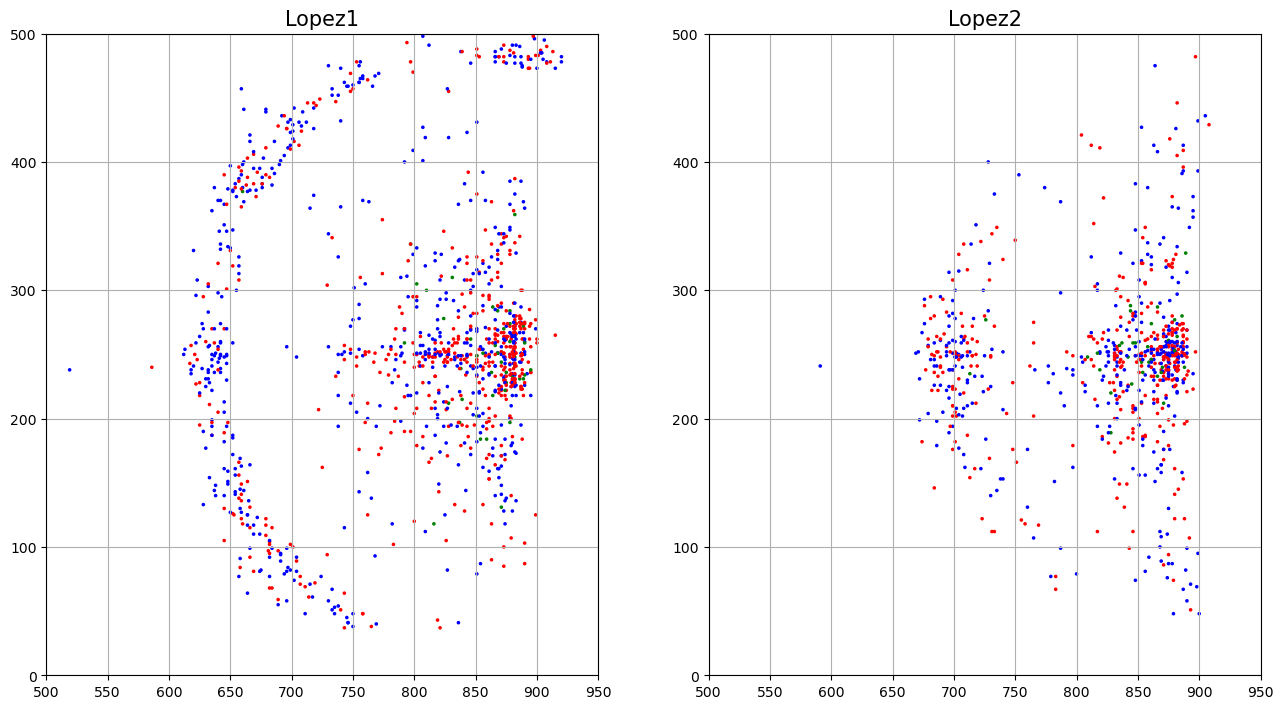

In [51]:
# (6) Create the plot of Brook Lopez and Robin Lopez side by side

Lopez1 = shot[shot['shoot_player']=='Brook Lopez']
Lopez2 = shot[shot['shoot_player']=='Robin Lopez']


hxL1= Lopez1['halfcourt_x']
hyL1= Lopez1['halfcourt_y']
hxL2= Lopez2['halfcourt_x']
hyL2= Lopez2['halfcourt_y']

f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(Lopez1['current_shot_outcome']=='SCORED','r',np.where(Lopez1['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxL1,hyL1,s=10,c=colors,marker='.')
plt.grid(True)
plt.xlim(500,950)
plt.ylim(0,500)
plt.title('Lopez1', fontsize=15)
ax = f.add_subplot(122)
colors = np.where(Lopez2['current_shot_outcome']=='SCORED','r',np.where(Lopez2['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxL2,hyL2,s=10,c=colors,marker='.')
plt.grid(True)
plt.xlim(500,950)
plt.ylim(0,500)
plt.title('Lopez2', fontsize=15)

In [54]:
# Q1: Which of the four players had the greatest number of shots in the season? (Durant, Howard, Jordan, Westbrook)
Durant.describe()

,location_x,points,location_y,time_from_last_shot,quarter,halfcourt_x,halfcourt_y
count,1026.000000,1026.000000,1026.000000,956.000000,1026.000000,1026.000000,1026.000000
mean,452.577973,2.304094,247.560429,33.447699,2.366472,785.146199,262.770955
std,331.260252,0.460247,102.576129,19.126703,1.111451,91.065402,101.806498
min,35.000000,2.000000,9.000000,0.000000,1.000000,513.000000,36.000000
25%,112.250000,2.000000,192.000000,22.000000,1.000000,713.000000,210.000000
50%,308.000000,2.000000,250.000000,30.000000,2.000000,802.000000,250.000000
75%,794.000000,3.000000,300.750000,41.000000,3.000000,873.000000,321.000000
max,928.000000,3.000000,496.000000,138.000000,6.000000,928.000000,496.000000


In [40]:
Howard.describe()

,location_x,points,location_y,time_from_last_shot,quarter,halfcourt_x,halfcourt_y
count,614.000000,614.000000,614.000000,582.000000,614.000000,614.000000,614.000000
mean,472.602606,2.003257,251.252443,27.797251,2.214984,868.947883,249.496743
std,404.056032,0.057026,40.704719,24.444256,1.080467,32.711860,40.720900
min,30.000000,2.000000,12.000000,0.000000,1.000000,681.000000,71.000000
25%,54.250000,2.000000,244.250000,4.000000,1.000000,866.000000,246.000000
50%,696.000000,2.000000,250.000000,28.000000,2.000000,881.000000,250.000000
75%,885.750000,2.000000,254.000000,38.000000,3.000000,886.000000,256.000000
max,905.000000,3.000000,480.000000,206.000000,6.000000,905.000000,488.000000


In [42]:
Jordan.describe()

,location_x,points,location_y,time_from_last_shot,quarter,halfcourt_x,halfcourt_y
count,577.000000,577.000000,577.000000,551.000000,577.000000,577.000000,577.000000
mean,467.776430,2.003466,250.726170,24.803993,2.230503,875.544194,249.273830
std,410.069375,0.058823,18.456346,21.238936,1.080399,23.471064,18.456346
min,50.000000,2.000000,130.000000,0.000000,1.000000,627.000000,45.000000
25%,53.000000,2.000000,250.000000,3.000000,1.000000,873.000000,248.000000
50%,274.000000,2.000000,250.000000,26.000000,2.000000,881.000000,250.000000
75%,888.000000,2.000000,252.000000,36.000000,3.000000,888.000000,250.000000
max,904.000000,3.000000,455.000000,189.000000,5.000000,904.000000,370.000000


In [44]:
Westbrook.describe()

,location_x,points,location_y,time_from_last_shot,quarter,halfcourt_x,halfcourt_y
count,1940.000000,1940.000000,1940.000000,1904.000000,1940.000000,1940.000000,1940.000000
mean,477.476804,2.300515,251.214433,33.243172,2.597938,784.849485,254.908247
std,330.828160,0.458600,101.221592,19.341639,1.135119,90.383419,101.109757
min,35.000000,2.000000,9.000000,0.000000,1.000000,561.000000,35.000000
25%,145.750000,2.000000,192.000000,22.000000,2.000000,704.000000,190.000000
50%,625.000000,2.000000,250.000000,30.000000,3.000000,804.000000,250.000000
75%,819.000000,3.000000,321.500000,41.000000,4.000000,875.000000,315.000000
max,905.000000,3.000000,490.000000,172.000000,5.000000,905.000000,491.000000


In [56]:
Lopez1.describe()

,location_x,points,location_y,time_from_last_shot,quarter,halfcourt_x,halfcourt_y
count,1173.000000,1173.000000,1173.000000,1100.000000,1173.000000,1173.000000,1173.000000
mean,473.720375,2.329071,251.539642,33.105455,2.355499,798.914749,262.392157
std,344.239046,0.470076,100.631968,20.064767,1.132350,89.212393,99.877269
min,22.000000,2.000000,2.000000,0.000000,1.000000,519.000000,37.000000
25%,107.000000,2.000000,213.000000,22.000000,1.000000,729.000000,218.000000
50%,627.000000,2.000000,250.000000,30.000000,2.000000,835.000000,250.000000
75%,838.000000,3.000000,297.000000,40.000000,3.000000,875.000000,302.000000
max,920.000000,3.000000,498.000000,156.000000,6.000000,920.000000,498.000000


### 🔎 Answer: 

Russell Westbrook has the highest shot count with 1940 shots.